## SVM using SKLEARN

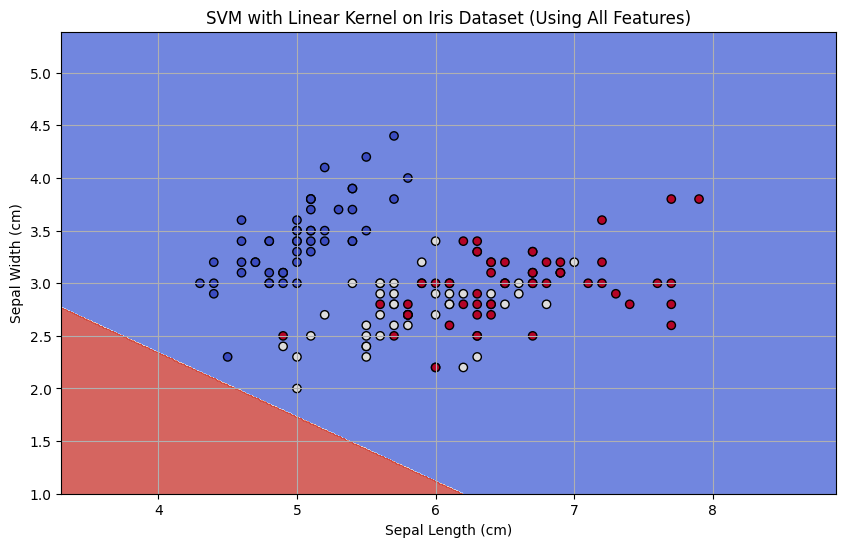

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('files/iris.csv')

X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = data['Species'].values

le = LabelEncoder()
y_encoded = le.fit_transform(y)

classifier = svm.SVC(kernel='linear', decision_function_shape='ovr')
classifier.fit(X, y_encoded)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

petal_length_median = np.median(X[:, 2])
petal_width_median = np.median(X[:, 3])

ZZ = np.full(xx.shape, petal_length_median)
WW = np.full(yy.shape, petal_width_median)

Z = classifier.predict(np.c_[xx.ravel(), yy.ravel(), ZZ.ravel(), WW.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y_encoded, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
plt.title('SVM with Linear Kernel on Iris Dataset (Using All Features)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid()
plt.show()

plt.show()


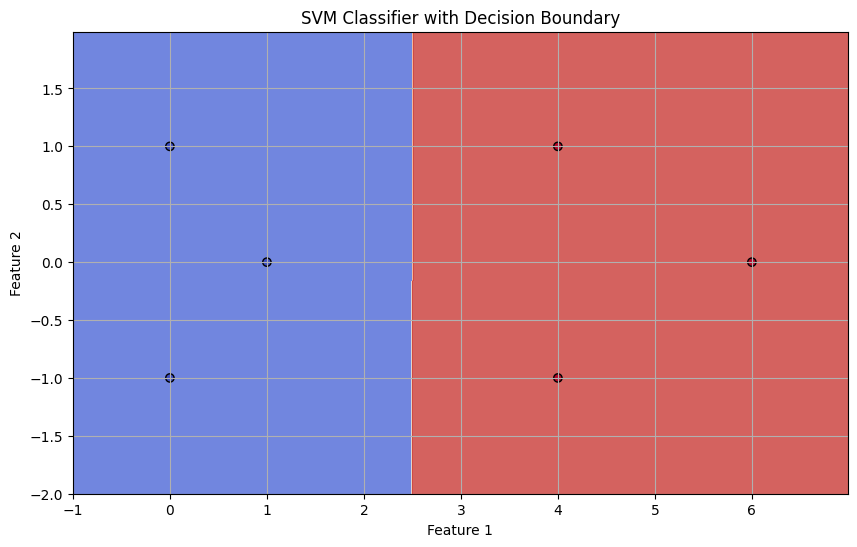

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

X = np.array([[4, 1], [4, -1], [6, 0], 
              [1, 0], [0, 1], [0, -1]])  

y = np.array([1, 1, 1, -1, -1, -1]) 
classifier = svm.SVC(kernel='linear')
classifier.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
plt.title('SVM Classifier with Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid()
plt.show()

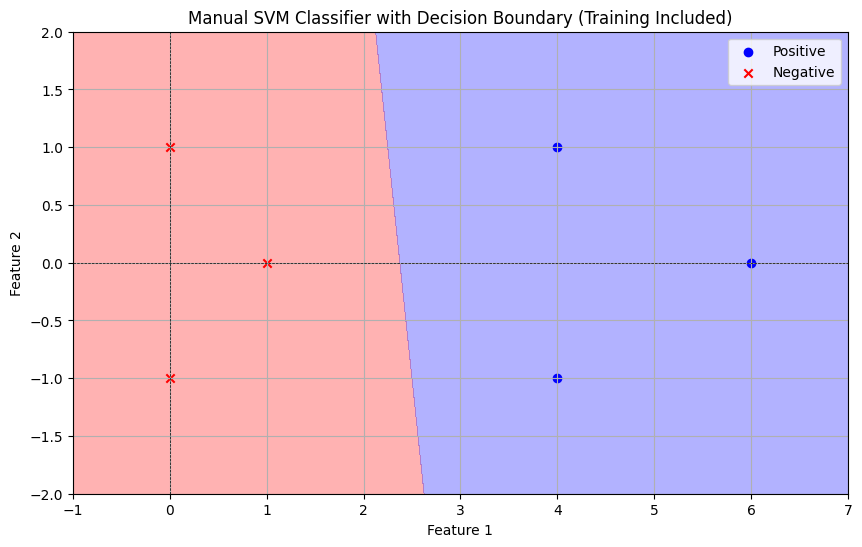

In [7]:
import numpy as np
import matplotlib.pyplot as plt

X_pos = np.array([[4, 1], [4, -1], [6, 0]]) 
X_neg = np.array([[1, 0], [0, 1], [0, -1]])  
X = np.vstack((X_pos, X_neg))
y = np.array([1, 1, 1, -1, -1, -1])

learning_rate = 0.1
n_iterations = 100
weights = np.zeros(X.shape[1])
bias = 0  

for _ in range(n_iterations):
    for idx, x_i in enumerate(X):
        if y[idx] * (np.dot(x_i, weights) + bias) < 1:
            weights += learning_rate * (y[idx] * x_i)
            bias += learning_rate * y[idx]

x_min, x_max = -1, 7
y_min, y_max = -2, 2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = np.dot(np.c_[xx.ravel(), yy.ravel()], weights) + bias
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, levels=[-10, 0, 10], alpha=0.3, colors=('red', 'blue'))
plt.scatter(X_pos[:, 0], X_pos[:, 1], color='blue', label='Positive', marker='o')
plt.scatter(X_neg[:, 0], X_neg[:, 1], color='red', label='Negative', marker='x')
plt.title('Manual SVM Classifier with Decision Boundary (Training Included)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()
plt.grid()
plt.show()

C:\Users\prate\AppData\Local\Temp\ipykernel_17452\3208600003.py:16: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(X1, X2, Z, levels=[-100, 0], colors='red', alpha=0.3, label='1 + 3X1 - X2 < 0')
C:\Users\prate\AppData\Local\Temp\ipykernel_17452\3208600003.py:17: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(X1, X2, Z, levels=[0, 100], colors='green', alpha=0.3, label='1 + 3X1 - X2 > 0')


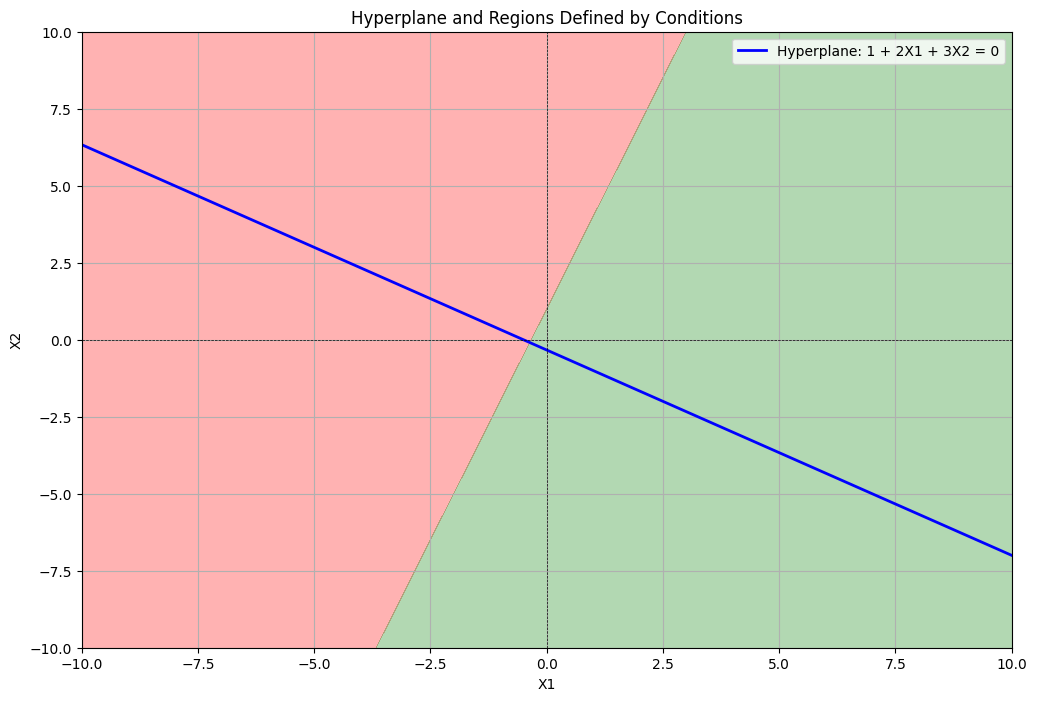

Slope of the hyperplane: -0.6666666666666666
Y-Intercept of the hyperplane: -0.3333333333333333


In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_hyperplane_and_regions():
    x1 = np.arange(-10, 11, 1)  
    x2_hyperplane = (-2/3) * x1 - 1/3

    X1, X2 = np.meshgrid(np.linspace(-10, 10, 400), np.linspace(-10, 10, 400))
    
    Z = 1 + 3*X1 - X2

    plt.figure(figsize=(12, 8))

    plt.plot(x1, x2_hyperplane, label='Hyperplane: 1 + 2X1 + 3X2 = 0', color='blue', linewidth=2)

    plt.contourf(X1, X2, Z, levels=[-100, 0], colors='red', alpha=0.3, label='1 + 3X1 - X2 < 0')
    plt.contourf(X1, X2, Z, levels=[0, 100], colors='green', alpha=0.3, label='1 + 3X1 - X2 > 0')

    plt.title('Hyperplane and Regions Defined by Conditions')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.grid()
    plt.legend()
    plt.show()

    slope = -2 / 3
    intercept = -1 / 3
    print(f'Slope of the hyperplane: {slope}')
    print(f'Y-Intercept of the hyperplane: {intercept}')

plot_hyperplane_and_regions()


C:\Users\prate\AppData\Local\Temp\ipykernel_17452\3425108358.py:18: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, Z1, levels=[0], colors='blue', linewidths=2, label='Hyperplane 1: 5 + 2x1 + 5x2 = 0')
C:\Users\prate\AppData\Local\Temp\ipykernel_17452\3425108358.py:21: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, Z2, levels=[0], colors='orange', linewidths=2, label='Hyperplane 2: 5 + 20x1 + 50x2 = 0')


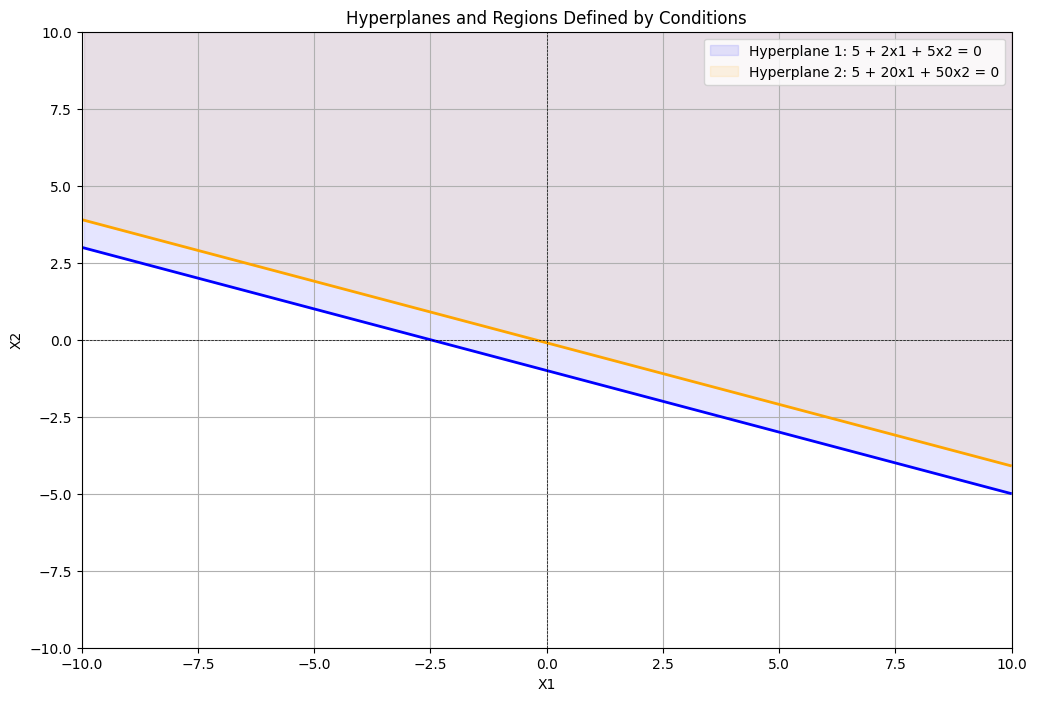

Hyperplane 1: Slope = -0.4, Intercept = -1
Hyperplane 2: Slope = -0.04, Intercept = -0.1


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def plot_hyperplanes():
    x1 = np.linspace(-10, 10, 400)

    x2_h1 = (-2/5) * x1 - 1

    x2_h2 = (-2/5) * x1 - 1/10

    X1, X2 = np.meshgrid(np.linspace(-10, 10, 400), np.linspace(-10, 10, 400))
    
    Z1 = 5 + 2*X1 + 5*X2
    Z2 = 5 + 20*X1 + 50*X2

    plt.figure(figsize=(12, 8))

    plt.contour(X1, X2, Z1, levels=[0], colors='blue', linewidths=2, label='Hyperplane 1: 5 + 2x1 + 5x2 = 0')
    plt.fill_between(x1, (-2/5)*x1 - 1, 10, where=(x1 > -10), color='blue', alpha=0.1)

    plt.contour(X1, X2, Z2, levels=[0], colors='orange', linewidths=2, label='Hyperplane 2: 5 + 20x1 + 50x2 = 0')
    plt.fill_between(x1, (-2/5)*x1 - 1/10, 10, where=(x1 > -10), color='orange', alpha=0.1)

    plt.title('Hyperplanes and Regions Defined by Conditions')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.grid()
    plt.legend(['Hyperplane 1: 5 + 2x1 + 5x2 = 0', 'Hyperplane 2: 5 + 20x1 + 50x2 = 0'])
    plt.show()

    slope1 = -2 / 5
    intercept1 = -1

    slope2 = -2 / 50  
    intercept2 = -1 / 10

    print(f'Hyperplane 1: Slope = {slope1}, Intercept = {intercept1}')
    print(f'Hyperplane 2: Slope = {slope2}, Intercept = {intercept2}')

plot_hyperplanes()
